In [25]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

In [26]:
# Veri setini yükleme
data = pd.read_csv('car_price.csv')
print(data)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

<Axes: >

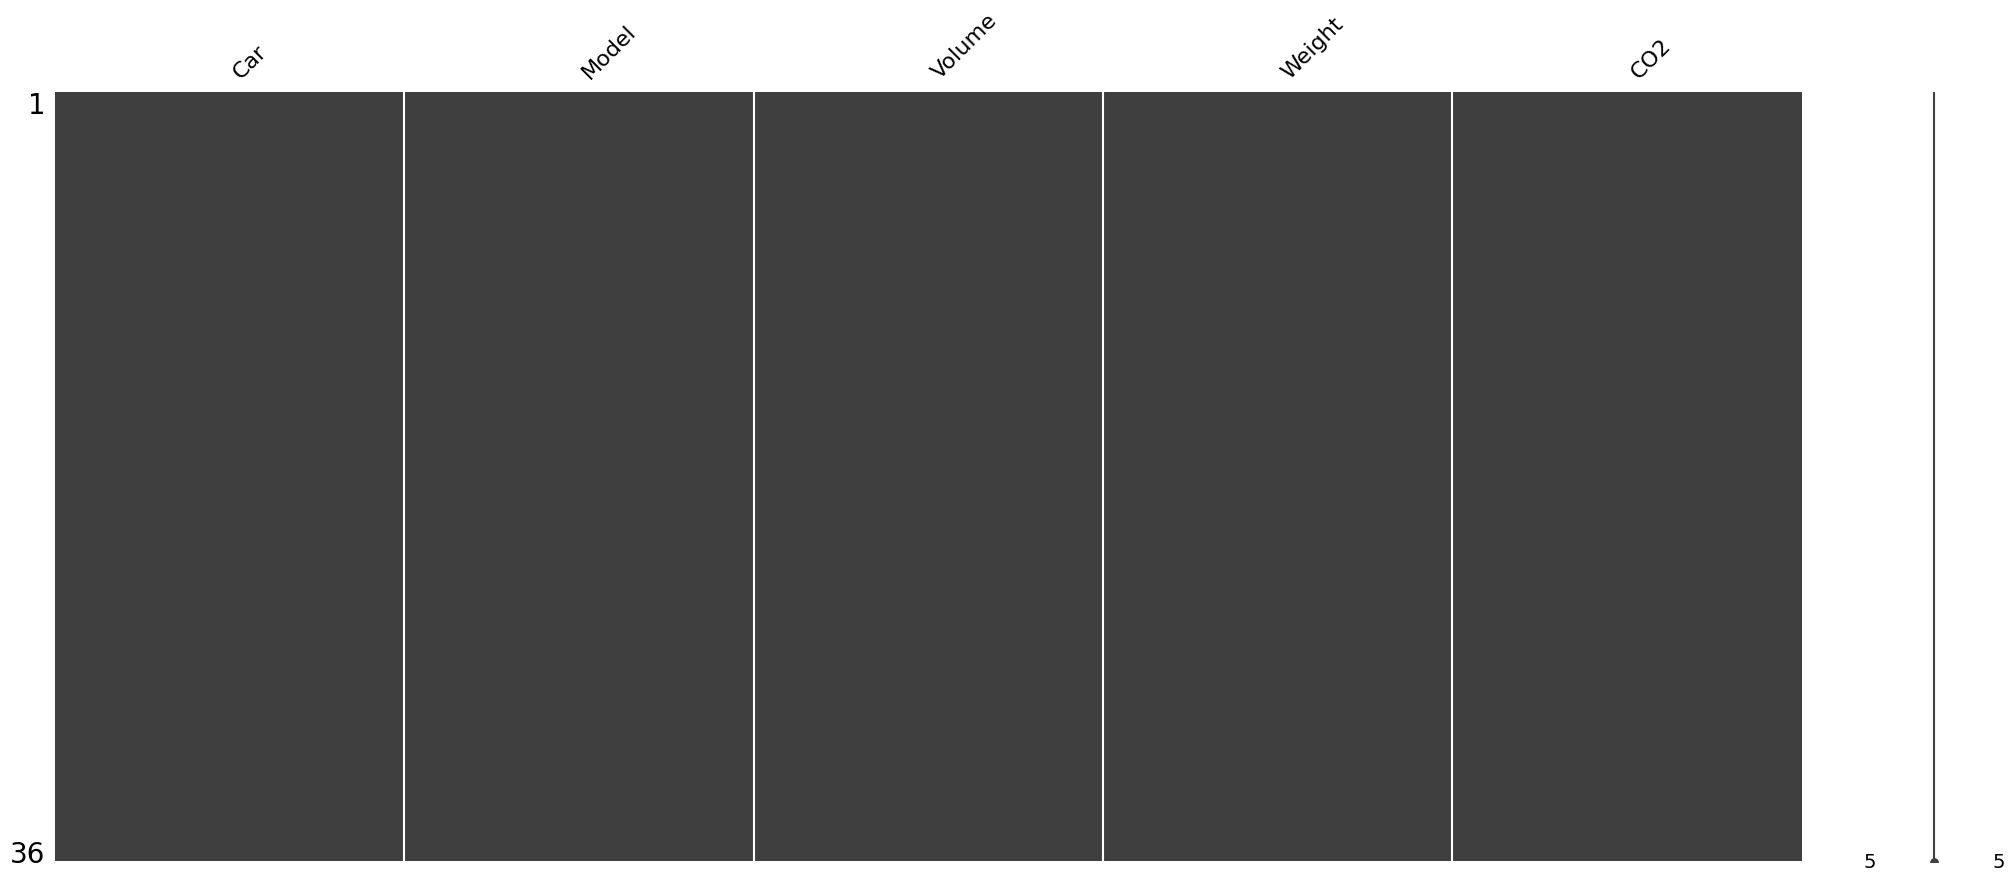

In [27]:
missingno.matrix(data)

In [28]:
# Bağımsız değişkenler ve hedef değişken belirleme
X = data[['Car', 'Model', 'Volume', 'Weight']]
y = data['CO2']

In [29]:
# Veri setini train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Sayısal ve kategorik sütunları işleme
numeric_features = ['Volume', 'Weight']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Car', 'Model']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [31]:
# Model oluşturma ve eğitme
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Volume', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Car', 'Model'])])),
                ('regressor', LinearRegression())])

In [32]:
# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

In [33]:
# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 91.36722698827403


In [35]:
print(f'R-squared: {r2}')

R-squared: -0.054934607117001155
